In [1]:
import torch
import torchvision
from project1_model_3 import project1_model_3
from project1_model_4 import project1_model_4
from project1_model_5 import project1_model_5
from project1_model_6 import project1_model_6
from torchsummary import summary
from torchtoolbox.transform import CIFAR10Policy, Cutout
from torchvision.transforms import Compose, RandomCrop, RandomHorizontalFlip, ToTensor, Normalize
import matplotlib.pyplot as plt

In [2]:
model_3 = project1_model_3().cuda()
summary(model_3, input_size=[(3, 32, 32)])

model_5 = project1_model_5().cuda()
summary(model_5, input_size=[(3, 32, 32)])

model_4 = project1_model_4().cuda()
summary(model_4, input_size=[(3, 32, 32)])

model_6 = project1_model_6().cuda()
summary(model_6, input_size=[(3, 32, 32)])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
            Conv2d-3           [-1, 32, 32, 32]           9,216
       BatchNorm2d-4           [-1, 32, 32, 32]              64
            Conv2d-5           [-1, 32, 32, 32]           9,216
       BatchNorm2d-6           [-1, 32, 32, 32]              64
        BasicBlock-7           [-1, 32, 32, 32]               0
            Conv2d-8           [-1, 32, 32, 32]           9,216
       BatchNorm2d-9           [-1, 32, 32, 32]              64
           Conv2d-10           [-1, 32, 32, 32]           9,216
      BatchNorm2d-11           [-1, 32, 32, 32]              64
       BasicBlock-12           [-1, 32, 32, 32]               0
           Conv2d-13           [-1, 64, 16, 16]          18,432
      BatchNorm2d-14           [-1, 64,

In [3]:
Epoch = 160
Batch_size = 128
Loss = torch.nn.CrossEntropyLoss()
optimizer_3 = torch.optim.Adam(model_3.parameters(), lr=3e-4, weight_decay=5e-4)
optimizer_5 = torch.optim.Adam(model_5.parameters(), lr=3e-4, weight_decay=5e-4)
optimizer_4 = torch.optim.Adam(model_4.parameters(), lr=3e-4, weight_decay=5e-4)
optimizer_6 = torch.optim.Adam(model_6.parameters(), lr=3e-4, weight_decay=5e-4)

In [4]:
transform_train = Compose(
        [RandomCrop(32, padding=4), RandomHorizontalFlip(), ToTensor(), Normalize(mean=[0.491, 0.482, 0.446], std=[0.247, 0.243, 0.261])])
transform_test = Compose(
        [ToTensor(), Normalize(mean=[0.491, 0.482, 0.446], std=[0.247, 0.243, 0.261])])
trainingdata = torchvision.datasets.CIFAR10('./CIFAR10/', train=True, download=True, transform=transform_train)
testdata = torchvision.datasets.CIFAR10('./CIFAR10/', train=False, download=True, transform=transform_test)




Files already downloaded and verified
Files already downloaded and verified


In [5]:
trainDataLoader_3 = torch.utils.data.DataLoader(trainingdata, Batch_size, shuffle=True)
testDataLoader_3 = torch.utils.data.DataLoader(testdata, Batch_size, shuffle=False)

start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

train_loss_history_3 = []
test_loss_history_3 = []
test_acc_history_3 = []

start.record()

for epoch in range(Epoch):
    train_loss = 0.0
    test_loss = 0.0
    test_acc = 0.0

    train_total = 0.0
    test_total = 0.0

    for i, data in enumerate(trainDataLoader_3):
        x, labels = data
        x = x.cuda()
        train_total+=labels.size(0)
        labels = labels.cuda()
        optimizer_3.zero_grad()
        predicted_output = model_3(x)
        fit = Loss(predicted_output, labels)
        fit.backward()
        optimizer_3.step()
        train_loss += fit.item()

    for i, data in enumerate(testDataLoader_3):
        with torch.no_grad():
            x, labels = data
            test_total += labels.size(0)
            x = x.cuda()
            labels = labels.cuda()
            predicted_output = model_3(x)
            fit = Loss(predicted_output, labels)
            test_loss += fit.item()
            test_acc += (torch.eq(torch.max(predicted_output, 1)[1], labels).sum()).data.cpu().numpy()

    train_loss = train_loss / len(trainDataLoader_3)
    test_loss = test_loss / len(testDataLoader_3)
    test_acc = test_acc / test_total

    train_loss_history_3.append(train_loss)
    test_loss_history_3.append(test_loss)
    test_acc_history_3.append(test_acc)

    print('Epoch %s, Train loss %s, Test loss %s, Test acc %s' % (epoch, train_loss, test_loss, test_acc))

end.record()
torch.cuda.synchronize()
print(start.elapsed_time(end))

Epoch 0, Train loss 1.3996432973905597, Test loss 1.1276598263390456, Test acc 0.5987
Epoch 1, Train loss 0.981083558496002, Test loss 0.8960961254337166, Test acc 0.6836
Epoch 2, Train loss 0.78188892017545, Test loss 0.7597072184840336, Test acc 0.7359
Epoch 3, Train loss 0.672566920213992, Test loss 0.6617908172215088, Test acc 0.7724
Epoch 4, Train loss 0.593117690604666, Test loss 0.6348963519440421, Test acc 0.785
Epoch 5, Train loss 0.5410421685032223, Test loss 0.5863019118580637, Test acc 0.7993
Epoch 6, Train loss 0.5027479223735497, Test loss 0.5613503429708602, Test acc 0.8081
Epoch 7, Train loss 0.4712403870909415, Test loss 0.5470913576928875, Test acc 0.812
Epoch 8, Train loss 0.43629166152318727, Test loss 0.5265312470212767, Test acc 0.8168
Epoch 9, Train loss 0.4121471826377732, Test loss 0.5092875493478172, Test acc 0.8251
Epoch 10, Train loss 0.39122834553956376, Test loss 0.5294433077679405, Test acc 0.8197
Epoch 11, Train loss 0.3749545648732149, Test loss 0.47572

Epoch 94, Train loss 0.08829439643894316, Test loss 0.3998016466068316, Test acc 0.8849
Epoch 95, Train loss 0.08436898857145511, Test loss 0.40809580627121506, Test acc 0.8842
Epoch 96, Train loss 0.08959472745828465, Test loss 0.40449265324616734, Test acc 0.8868
Epoch 97, Train loss 0.08725441801254555, Test loss 0.38233346690105485, Test acc 0.8894
Epoch 98, Train loss 0.08577991312231555, Test loss 0.40540189154540435, Test acc 0.8849
Epoch 99, Train loss 0.08762018094339487, Test loss 0.38406920414182205, Test acc 0.8897
Epoch 100, Train loss 0.08851289928502515, Test loss 0.39015842540354667, Test acc 0.8842
Epoch 101, Train loss 0.08580588680379989, Test loss 0.40373188691048684, Test acc 0.8847
Epoch 102, Train loss 0.08552482303784555, Test loss 0.3914683957265902, Test acc 0.8871
Epoch 103, Train loss 0.0834372247166722, Test loss 0.40070216112498996, Test acc 0.8861
Epoch 104, Train loss 0.0840002050780503, Test loss 0.3861714218613468, Test acc 0.8839
Epoch 105, Train loss

In [6]:
trainDataLoader_5 = torch.utils.data.DataLoader(trainingdata, Batch_size, shuffle=True)
testDataLoader_5 = torch.utils.data.DataLoader(testdata, Batch_size, shuffle=False)

start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

train_loss_history_5 = []
test_loss_history_5 = []
test_acc_history_5 = []

start.record()

for epoch in range(Epoch):
    train_loss = 0.0
    test_loss = 0.0
    test_acc = 0.0

    train_total = 0.0
    test_total = 0.0

    for i, data in enumerate(trainDataLoader_5):
        x, labels = data
        x = x.cuda()
        train_total+=labels.size(0)
        labels = labels.cuda()
        optimizer_5.zero_grad()
        predicted_output = model_5(x)
        fit = Loss(predicted_output, labels)
        fit.backward()
        optimizer_5.step()
        train_loss += fit.item()

    for i, data in enumerate(testDataLoader_5):
        with torch.no_grad():
            x, labels = data
            test_total += labels.size(0)
            x = x.cuda()
            labels = labels.cuda()
            predicted_output = model_5(x)
            fit = Loss(predicted_output, labels)
            test_loss += fit.item()
            test_acc += (torch.eq(torch.max(predicted_output, 1)[1], labels).sum()).data.cpu().numpy()

    train_loss = train_loss / len(trainDataLoader_5)
    test_loss = test_loss / len(testDataLoader_5)
    test_acc = test_acc / test_total

    train_loss_history_5.append(train_loss)
    test_loss_history_5.append(test_loss)
    test_acc_history_5.append(test_acc)

    print('Epoch %s, Train loss %s, Test loss %s, Test acc %s' % (epoch, train_loss, test_loss, test_acc))

end.record()
torch.cuda.synchronize()
print(start.elapsed_time(end))

Epoch 0, Train loss 1.3512280220570771, Test loss 1.0401513010640688, Test acc 0.6269
Epoch 1, Train loss 0.9259611805686561, Test loss 0.8161796127693562, Test acc 0.7172
Epoch 2, Train loss 0.7551223407011203, Test loss 0.734271349031714, Test acc 0.747
Epoch 3, Train loss 0.658565077787775, Test loss 0.6373371542254581, Test acc 0.7818
Epoch 4, Train loss 0.5908216712115061, Test loss 0.6064492052868952, Test acc 0.7868
Epoch 5, Train loss 0.535709175154986, Test loss 0.5839268731165536, Test acc 0.7987
Epoch 6, Train loss 0.49899465775550783, Test loss 0.542550841464272, Test acc 0.8155
Epoch 7, Train loss 0.46530505115418785, Test loss 0.5057266803481911, Test acc 0.8236
Epoch 8, Train loss 0.4360835097177559, Test loss 0.5113906022868578, Test acc 0.8175
Epoch 9, Train loss 0.411133007053524, Test loss 0.4914974042131931, Test acc 0.8328
Epoch 10, Train loss 0.3909863734717869, Test loss 0.4867024053878422, Test acc 0.833
Epoch 11, Train loss 0.36621323795727145, Test loss 0.4714

Epoch 94, Train loss 0.07985042043439948, Test loss 0.41570448328422593, Test acc 0.8866
Epoch 95, Train loss 0.0842660204662234, Test loss 0.43862122316149216, Test acc 0.8789
Epoch 96, Train loss 0.08532028477591322, Test loss 0.4220104209984405, Test acc 0.8834
Epoch 97, Train loss 0.07946415632829794, Test loss 0.42045264794856685, Test acc 0.8844
Epoch 98, Train loss 0.08459340656161918, Test loss 0.423272799653343, Test acc 0.8846
Epoch 99, Train loss 0.08221946401364358, Test loss 0.3994825269225277, Test acc 0.8873
Epoch 100, Train loss 0.0804292809532579, Test loss 0.4081252183340773, Test acc 0.8845
Epoch 101, Train loss 0.08392574265837441, Test loss 0.40826744671109355, Test acc 0.8861
Epoch 102, Train loss 0.08188201614734157, Test loss 0.3956144006946419, Test acc 0.8893
Epoch 103, Train loss 0.07833486347866561, Test loss 0.40302216384229783, Test acc 0.8887
Epoch 104, Train loss 0.08497921018230031, Test loss 0.41759640280204485, Test acc 0.8829
Epoch 105, Train loss 0.

In [7]:
trainDataLoader_4 = torch.utils.data.DataLoader(trainingdata, Batch_size, shuffle=True)
testDataLoader_4 = torch.utils.data.DataLoader(testdata, Batch_size, shuffle=False)

start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

train_loss_history_4 = []
test_loss_history_4 = []
test_acc_history_4 = []

start.record()

for epoch in range(Epoch):
    train_loss = 0.0
    test_loss = 0.0
    test_acc = 0.0

    train_total = 0.0
    test_total = 0.0

    for i, data in enumerate(trainDataLoader_4):
        x, labels = data
        x = x.cuda()
        train_total+=labels.size(0)
        labels = labels.cuda()
        optimizer_4.zero_grad()
        predicted_output = model_4(x)
        fit = Loss(predicted_output, labels)
        fit.backward()
        optimizer_4.step()
        train_loss += fit.item()

    for i, data in enumerate(testDataLoader_4):
        with torch.no_grad():
            x, labels = data
            test_total += labels.size(0)
            x = x.cuda()
            labels = labels.cuda()
            predicted_output = model_4(x)
            fit = Loss(predicted_output, labels)
            test_loss += fit.item()
            test_acc += (torch.eq(torch.max(predicted_output, 1)[1], labels).sum()).data.cpu().numpy()

    train_loss = train_loss / len(trainDataLoader_4)
    test_loss = test_loss / len(testDataLoader_4)
    test_acc = test_acc / test_total

    train_loss_history_4.append(train_loss)
    test_loss_history_4.append(test_loss)
    test_acc_history_4.append(test_acc)

    print('Epoch %s, Train loss %s, Test loss %s, Test acc %s' % (epoch, train_loss, test_loss, test_acc))

end.record()
torch.cuda.synchronize()
print(start.elapsed_time(end))

Epoch 0, Train loss 1.5157269791264059, Test loss 1.2707701468769508, Test acc 0.5416
Epoch 1, Train loss 1.0563845826536797, Test loss 0.9591862227343306, Test acc 0.6569
Epoch 2, Train loss 0.8250265616894988, Test loss 0.8082169030286088, Test acc 0.7182
Epoch 3, Train loss 0.6997518133171989, Test loss 0.6782938079743446, Test acc 0.7659
Epoch 4, Train loss 0.6088904134757683, Test loss 0.6069275800940357, Test acc 0.7941
Epoch 5, Train loss 0.552262796846497, Test loss 0.5739489771142791, Test acc 0.8064
Epoch 6, Train loss 0.5071728581662678, Test loss 0.5329511772982681, Test acc 0.8204
Epoch 7, Train loss 0.4687902723889217, Test loss 0.5209867211082314, Test acc 0.8214
Epoch 8, Train loss 0.44679489423094504, Test loss 0.4997553025619893, Test acc 0.8318
Epoch 9, Train loss 0.4122026138141027, Test loss 0.4931058068818684, Test acc 0.8337
Epoch 10, Train loss 0.3941352695912656, Test loss 0.48430530330802823, Test acc 0.8396
Epoch 11, Train loss 0.3770833564612567, Test loss 0

Epoch 94, Train loss 0.08760047498423501, Test loss 0.38753798358802555, Test acc 0.8904
Epoch 95, Train loss 0.09061451501134411, Test loss 0.37834915462173996, Test acc 0.8926
Epoch 96, Train loss 0.08971484950112413, Test loss 0.3766103664153739, Test acc 0.8936
Epoch 97, Train loss 0.08372636189412735, Test loss 0.36570500290092034, Test acc 0.8937
Epoch 98, Train loss 0.090235672867321, Test loss 0.34974737691728375, Test acc 0.8993
Epoch 99, Train loss 0.09211943409574763, Test loss 0.357064429151861, Test acc 0.9013
Epoch 100, Train loss 0.08474921306018787, Test loss 0.3731924948058551, Test acc 0.8944
Epoch 101, Train loss 0.08823769123715056, Test loss 0.3507763279389732, Test acc 0.9007
Epoch 102, Train loss 0.08350519129477652, Test loss 0.3590897523526904, Test acc 0.899
Epoch 103, Train loss 0.08621154858461579, Test loss 0.3739137121393711, Test acc 0.8952
Epoch 104, Train loss 0.08427843545584957, Test loss 0.35966596592076217, Test acc 0.9014
Epoch 105, Train loss 0.08

In [8]:
trainDataLoader_6 = torch.utils.data.DataLoader(trainingdata, Batch_size, shuffle=True)
testDataLoader_6 = torch.utils.data.DataLoader(testdata, Batch_size, shuffle=False)

start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

train_loss_history_6 = []
test_loss_history_6 = []
test_acc_history_6 = []

start.record()

for epoch in range(Epoch):
    train_loss = 0.0
    test_loss = 0.0
    test_acc = 0.0

    train_total = 0.0
    test_total = 0.0

    for i, data in enumerate(trainDataLoader_6):
        x, labels = data
        x = x.cuda()
        train_total+=labels.size(0)
        labels = labels.cuda()
        optimizer_6.zero_grad()
        predicted_output = model_6(x)
        fit = Loss(predicted_output, labels)
        fit.backward()
        optimizer_6.step()
        train_loss += fit.item()

    for i, data in enumerate(testDataLoader_6):
        with torch.no_grad():
            x, labels = data
            test_total += labels.size(0)
            x = x.cuda()
            labels = labels.cuda()
            predicted_output = model_6(x)
            fit = Loss(predicted_output, labels)
            test_loss += fit.item()
            test_acc += (torch.eq(torch.max(predicted_output, 1)[1], labels).sum()).data.cpu().numpy()

    train_loss = train_loss / len(trainDataLoader_6)
    test_loss = test_loss / len(testDataLoader_6)
    test_acc = test_acc / test_total

    train_loss_history_6.append(train_loss)
    test_loss_history_6.append(test_loss)
    test_acc_history_6.append(test_acc)

    print('Epoch %s, Train loss %s, Test loss %s, Test acc %s' % (epoch, train_loss, test_loss, test_acc))

end.record()
torch.cuda.synchronize()
print(start.elapsed_time(end))

Epoch 0, Train loss 1.4156737431235935, Test loss 1.1241452452502674, Test acc 0.5962
Epoch 1, Train loss 0.9785480250787857, Test loss 0.8995314112192467, Test acc 0.6736
Epoch 2, Train loss 0.7900457802940818, Test loss 0.7553403875495814, Test acc 0.7398
Epoch 3, Train loss 0.6827287921667708, Test loss 0.6647780809221389, Test acc 0.7724
Epoch 4, Train loss 0.6180765859001432, Test loss 0.6466539023043234, Test acc 0.7759
Epoch 5, Train loss 0.5564052861974672, Test loss 0.6051898413821112, Test acc 0.7923
Epoch 6, Train loss 0.52037642267354, Test loss 0.5579359935054297, Test acc 0.808
Epoch 7, Train loss 0.4836694773124612, Test loss 0.5587929381599909, Test acc 0.8062
Epoch 8, Train loss 0.4569188911286766, Test loss 0.5145145243481745, Test acc 0.8227
Epoch 9, Train loss 0.4355805485754672, Test loss 0.5392417466338677, Test acc 0.8177
Epoch 10, Train loss 0.41230564402497333, Test loss 0.4945880170864395, Test acc 0.8329
Epoch 11, Train loss 0.39462124291435835, Test loss 0.4

Epoch 94, Train loss 0.09987464705791772, Test loss 0.38139529224438, Test acc 0.8919
Epoch 95, Train loss 0.10141377259627023, Test loss 0.41880968326254736, Test acc 0.8839
Epoch 96, Train loss 0.10689389115423345, Test loss 0.3864802408821975, Test acc 0.8895
Epoch 97, Train loss 0.10228238241446902, Test loss 0.35748422655123696, Test acc 0.8951
Epoch 98, Train loss 0.10581015716390231, Test loss 0.37132896181148817, Test acc 0.8906
Epoch 99, Train loss 0.10204264107148361, Test loss 0.37953162664854073, Test acc 0.8927
Epoch 100, Train loss 0.10033019737857382, Test loss 0.3725074580575846, Test acc 0.8927
Epoch 101, Train loss 0.10099792598134569, Test loss 0.38191422263655483, Test acc 0.8951
Epoch 102, Train loss 0.10180890729741367, Test loss 0.3783970495945291, Test acc 0.8911
Epoch 103, Train loss 0.09922083023259097, Test loss 0.3792634657289408, Test acc 0.8914
Epoch 104, Train loss 0.09703799850686128, Test loss 0.38482655481069905, Test acc 0.8888
Epoch 105, Train loss 0

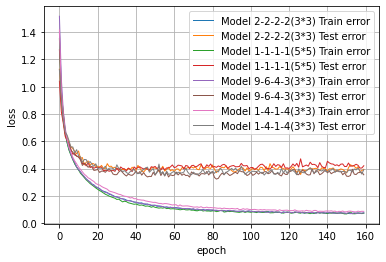

In [9]:
plt.plot(range(Epoch), train_loss_history_3, '-', linewidth=1, label='Model 2-2-2-2(3*3) Train error')
plt.plot(range(Epoch), test_loss_history_3, '-', linewidth=1, label='Model 2-2-2-2(3*3) Test error')
plt.plot(range(Epoch), train_loss_history_5, '-', linewidth=1, label='Model 1-1-1-1(5*5) Train error')
plt.plot(range(Epoch), test_loss_history_5, '-', linewidth=1, label='Model 1-1-1-1(5*5) Test error')
plt.plot(range(Epoch), train_loss_history_4, '-', linewidth=1, label='Model 9-6-4-3(3*3) Train error')
plt.plot(range(Epoch), test_loss_history_4, '-', linewidth=1, label='Model 9-6-4-3(3*3) Test error')
plt.plot(range(Epoch), train_loss_history_6, '-', linewidth=1, label='Model 1-4-1-4(3*3) Train error')
plt.plot(range(Epoch), test_loss_history_6, '-', linewidth=1, label='Model 1-4-1-4(3*3) Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

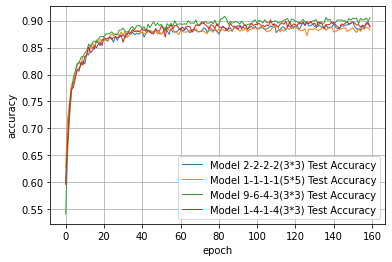

In [10]:
plt.plot(range(Epoch), test_acc_history_3, '-', linewidth=1, label='Model 2-2-2-2(3*3) Test Accuracy')
plt.plot(range(Epoch), test_acc_history_5, '-', linewidth=1, label='Model 1-1-1-1(5*5) Test Accuracy')
plt.plot(range(Epoch), test_acc_history_4, '-', linewidth=1, label='Model 9-6-4-3(3*3) Test Accuracy')
plt.plot(range(Epoch), test_acc_history_6, '-', linewidth=1, label='Model 1-4-1-4(3*3) Test Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()

In [11]:
print('Best Test acc for Model 2-2-2-2(3*3): %s' % (max(test_acc_history_3)))
print('Best Test acc for Model 1-1-1-1(5*5): %s' % (max(test_acc_history_5)))
print('Best Test acc for Model 9-6-4-3(3*3): %s' % (max(test_acc_history_4)))
print('Best Test acc for Model 1-4-1-4(3*3): %s' % (max(test_acc_history_6)))

Best Test acc for Model 2-2-2-2(3*3): 0.8978
Best Test acc for Model 1-1-1-1(5*5): 0.8906
Best Test acc for Model 9-6-4-3(3*3): 0.908
Best Test acc for Model 1-4-1-4(3*3): 0.9015


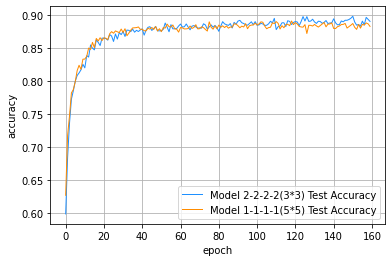

In [21]:
plt.plot(range(Epoch), test_acc_history_3, '-', linewidth=1, color='dodgerblue', label='Model 2-2-2-2(3*3) Test Accuracy')
plt.plot(range(Epoch), test_acc_history_5, '-', linewidth=1, color='darkorange', label='Model 1-1-1-1(5*5) Test Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()

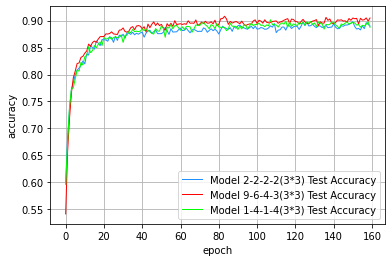

In [26]:
plt.plot(range(Epoch), test_acc_history_3, '-', linewidth=1, color='dodgerblue', label='Model 2-2-2-2(3*3) Test Accuracy')
plt.plot(range(Epoch), test_acc_history_4, '-', linewidth=1, color='red', label='Model 9-6-4-3(3*3) Test Accuracy')
plt.plot(range(Epoch), test_acc_history_6, '-', linewidth=1, color='lime', label='Model 1-4-1-4(3*3) Test Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()